In [275]:
# 라이브러리 로드
import os
import json
import csv
import requests
import folium
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import re

# total_Seoul = pd.read_excel('행정구역_서울_주민등록세대수_2024.xlsx')
# total_Seoul.head(10)

In [3]:
df1_total = pd.read_csv('catchtable.csv')
df1_total.head()

,name,cat_loc,rating,review,description,price_range
0,옳음 OLH EUM,한식 • 청담,4.3,(617),시즌별 테마로 구성되는 서호영 셰프의 모던 한식 다이닝,점심 가격변동 · 저녁 가격변동
1,바로크,"칵테일,위스키 • 한남",4.9,(46),하나뿐인 나만의 칵테일을 맛볼 수 있는 스피키지바,점심 영업안함 · 저녁 가격변동
2,권숙수,한식 • 청담,4.7,(920),"직접 담근 장, 김치, 식초, 장아찌로 전국에 진귀한 식재료를 이용하여 이 시대에 ...",점심 가격변동 · 저녁 가격변동
3,퀴진 라끌레,프랑스음식 • 서촌,4.7,(398),국내 최초 캐나다 퀘벡식 프렌치 레스토랑,점심 1 - 4만원 · 저녁 가격변동
4,이다 IDA,한식 • 종로,4.6,"(1,528)",한식 재료를 이용한 창의적인 요리를 선보이는 컨템포러리 레스토랑,점심 가격변동 · 저녁 가격변동


In [12]:
df2_pick = pd.read_csv('catchtable_pickup_data.csv')
df2_pick.head()

,Name,Category_Location,Rating,Review,Description,Price_Range
0,카페 레이어드 연남점,케이크 • 연남,4.9,(58),"유럽의 한 가정집의 따스함, 찰나의 스치는 런던과 파리의 빈티지한 무드를 담은 카페",픽업가 5 - 8만원
1,카페 페퍼,케이크 • 송파,4.4,(116),송리단길 글루텐프리 디저트 카페,픽업가 4 - 7만원
2,진저베어 압구정 현대백화점,"카페,디저트 • 압구정",4.7,(41),"잠실의 파이 전문 베이커리 카페 진저베어의 2호점 다양한 미트파이와, 스윗파이, 크...",픽업가 1 - 3만원
3,카페 레이어드 더현대서울점,케이크 • 여의도,5.0,(41),"유럽의 한 가정집의 따스함, 찰나의 스치는 런던과 파리의 빈티지한 무드를 담은 카페",픽업가 6 - 9만원
4,멜로드도산 롯데백화점 잠실점,케이크 • 잠실,4.7,(43),건강하고 좋은재료를 사용하여 건강하고 맛있고 아름다운 케이크를 만듭니다.,픽업가 5 - 6만원


In [7]:
df3_wating =  pd.read_csv('catchtable_waiting_data.csv')
df3_wating.head()

,Name,Category_Location,Rating,Review,Description,Price_Range
0,런던 베이글 뮤지엄 도산,"카페,디저트 • 도산공원",4.4,"(3,419)","방금 나온 베이글, 따뜻한 수프가 기다리는 가장 가까운 런던 속 베이글 뮤지엄",점심 저녁 동일가 1 - 2만원
1,산청숯불가든 마곡,돼지고기구이 • 마곡,4.6,(583),"산청흑돼지, 전통 숯가마, 산지 식재료로 우리만의 맛을 담은 고깃집* 원격 웨이팅이...",점심 저녁 동일가 2 - 6만원
2,라프레플루트,"카페,디저트 • 서울숲",4.3,(278),다양한 과일을 쉽고 간편하게 접할 수 있는 프리미엄 과일가게,점심 저녁 동일가 1 - 3만원
3,한소반 청계산점,"육류,고기요리 • 청계산",4.3,(197),보쌈으로 유명한 청계산 맛집,점심 저녁 동일가 1 - 2만원
4,크레이지카츠,돈가스 • 합정,4.7,(562),육즙이 살아있는 두툼한 일식 돈카츠,점심 저녁 동일가 1 - 2만원


In [ ]:
total_Seoul_mean = total_Seoul.groupby('행정구역(시군구)별').count()[]

In [20]:
from bs4 import BeautifulSoup
import requests as rq
import re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import time


url = 'https://www.findlatlng.org/#google_vignette'

# Chrome 드라이버 설정
driver = webdriver.Chrome()
driver.get(url)
time.sleep(2)

# response = requests.get(url, headers=headers)
# print(response)
soup = BeautifulSoup(response.content, 'html.parser')

In [20]:
# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
    
c = r.content
seoul_geo = json.loads(c)
                              # 각 구마다 어떻게 구성이 되어있는지 json형태로 확인가능

In [5]:
# 서울시 음식점 상권 데이터
seoul_data = pd.read_csv('filtered_combined_review_reservation_data.csv')
seoul_data.head()

# 필요한 컬럼만 발췌
seoul_data = seoul_data[['Name', 'Category', 'Location']]
seoul_data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'filtered_combined_review_reservation_data.csv'

In [7]:
seoul_data.to_excel('seoul.xlsx', index=False)

In [17]:

# 현재 작업 디렉토리 경로 얻기
current_directory = os.getcwd()
# 나눔바른고딕 글꼴 파일 경로 지정
font_path = os.path.join(current_directory, "NanumBarunGothic.ttf")

# 글꼴이 있는지 확인
if os.path.exists(font_path):
    # 폰트 추가
    fm.fontManager.addfont(font_path)

    # 캐시를 새로 고치지 않고 직접 폰트 설정
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc("font", family=font_prop.get_name())
    plt.rcParams["axes.unicode_minus"] = False  # 마이너스 부호 출력 설정

Category
다이닝바        282
이탈리아음식      221
이자카야        218
한식          207
일식          196
           ... 
러시아음식         1
노원            1
인도요리          1
돼지고기오마카세      1
철판요리          1
Name: count, Length: 72, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

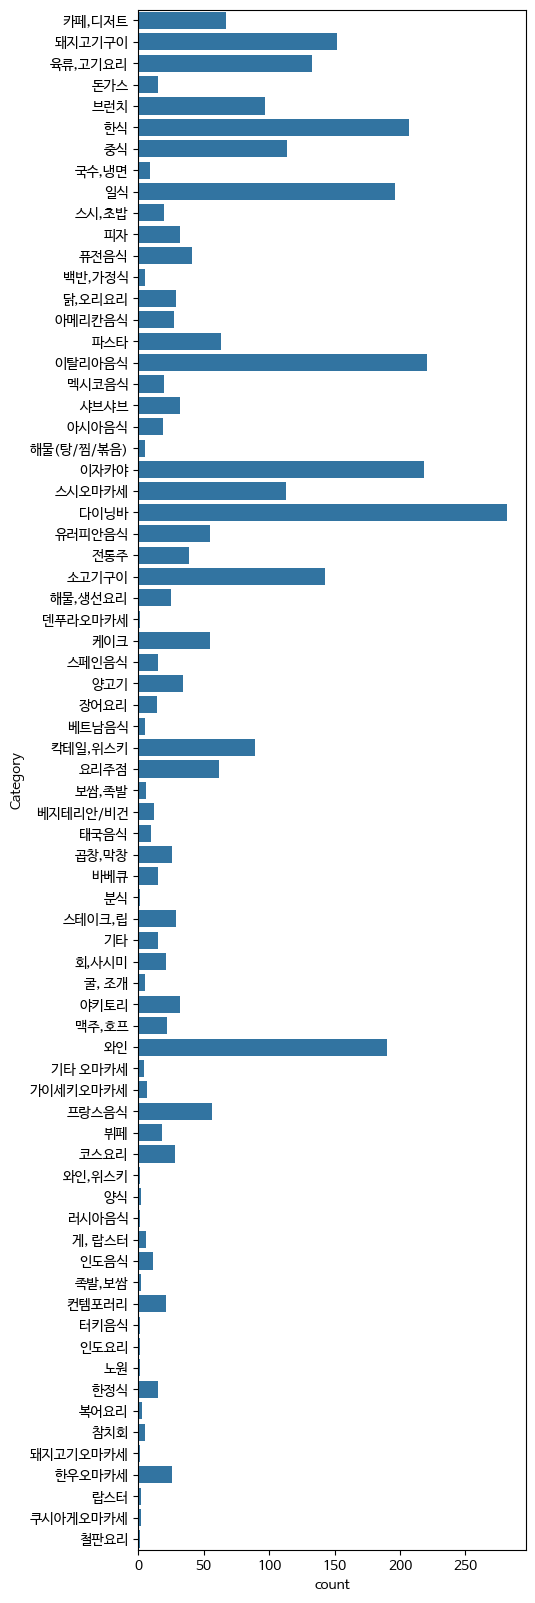

In [27]:

# 내부 카테고리 이름 확인
print(seoul_data.Category.value_counts())
seoul_data.Category.value_counts().index
plt.figure(figsize=(5,20))
sns.countplot(y=seoul_data.Category)


Location
성수      163
청담      125
연남      112
강남      102
한남       99
       ... 
솔빛섬       1
발산        1
등촌동       1
김포공항      1
우이동       1
Name: count, Length: 182, dtype: int64


<Axes: xlabel='count', ylabel='Location'>

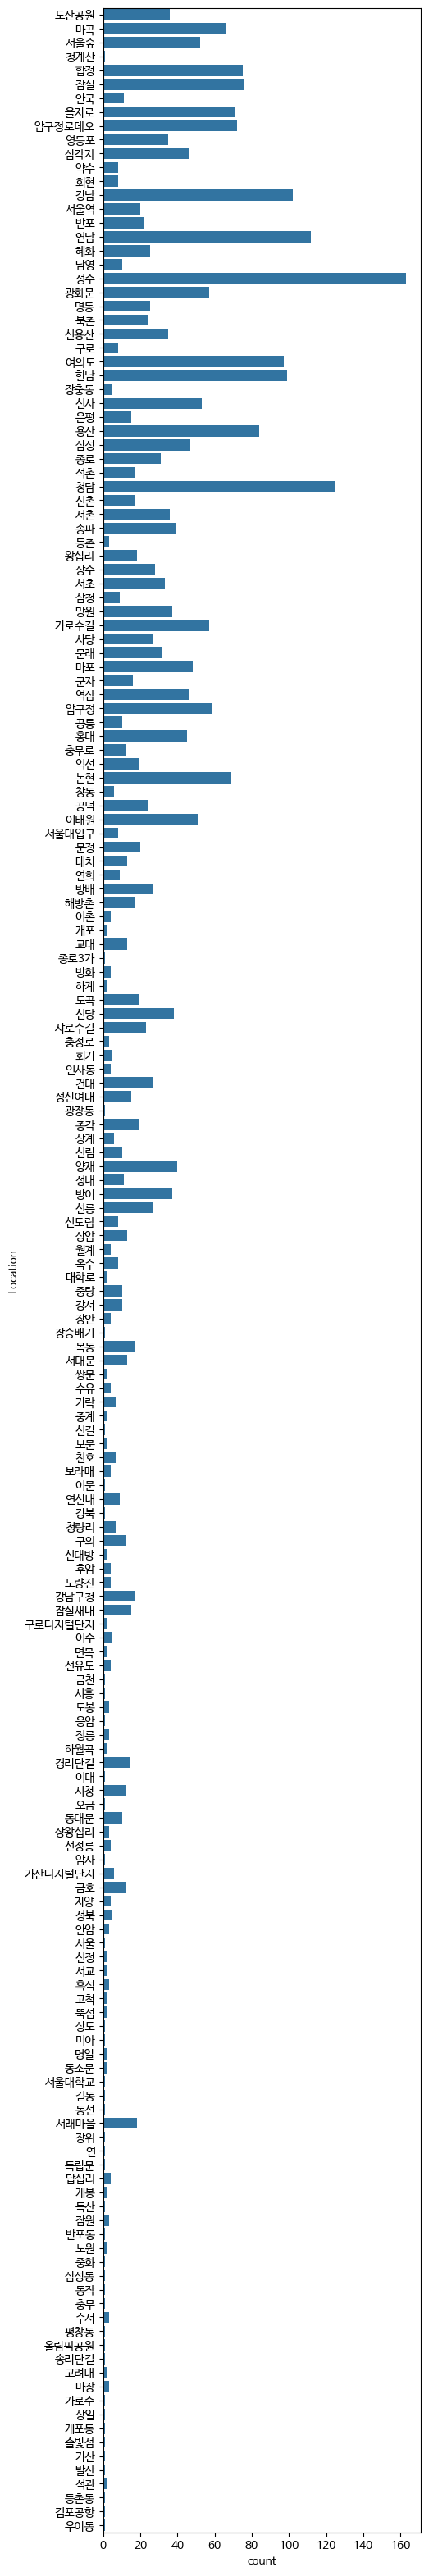

In [26]:
# 내부 로케이션 확인
print(seoul_data.Location.value_counts())
seoul_data.Location.value_counts().index
plt.figure(figsize=(5,40))
sns.countplot(y=seoul_data.Location)


In [ ]:
# Location 수정을 위해: 
location_c={
    '강남구': ['도산공원','압구정로데오','강남','신사','삼성','청담','가로수길','역삼','압구정','논현','대치','개포','도곡','선릉','매봉','강남구청','선정릉',
                '삼성동', '일원','수서','가로수','개포동'],
    '강동구': ['성내','천호','명일','암사','길동','고덕','둔촌동','상일'],
    '강북구': ['수유','강북','미아','우이동'],
    '강서구': ['마곡', '등촌','방화','강서','장승배기','발산','등촌동','김포공항'],
    '관악구': ['서울대입구','샤로수길','신림','관악','봉천','서울대학교','낙성대'],
    '광진구': ['군자','건대','광장동','구의','중곡','자양','뚝섬'],
    '구로구': ['구로','신도림','구로디지털단지','고척','개봉'],
    '금천구': ['금천','가산디지털단지','독산', '가산','시흥'],
    '노원구': ['공릉','하계','상계','월계','중계','노원'],
    '도봉구': ['창동','쌍문','도봉'],
    '동대문구': ['청량리','회기','장안','이문','신설동','동대문','전농','답십리'],
    '동작구': ['사당','노량진','상도','보라매','신대방','이수','동작','흑석'],
    '마포구': ['합정','연남','상수','망원','마포','홍대','공덕','상암','이대','서교','도화','연','신수'],
    '서대문구': ['신촌','연희','충정로','서대문','독립문'],
    '서초구': ['반포','서초','방배','교대','양재','서래마을','잠원', '반포동','솔빛섬','청계산'],
    '성동구': ['서울숲','성수','왕십리','옥수','상왕십리','금호','하왕십리', '행당','마장','서울'],
    '성북구': ['성신여대','보문','하월곡','정릉','동소문','성북','안암','동선','장위', '고려대','석관'],
    '송파구': ['잠실','석촌','송파','문정','방이','가락','잠실새내','송리단길', '올림픽공원'],
    '양천구': ['목동','오금','신정'],
    '영등포구': ['영등포','여의도','문래','신길','선유도','당산','양평'],
    '용산구': ['삼각지','서울역','남영','신용산','한남','용산','이태원','해방촌','이촌','후암','경리단길'],
    '은평구': ['은평','연신내','응암','녹번'],
    '종로구': ['안국','삼청','혜화','광화문','북촌','종로','서촌','익선','종로3가','인사동','종각','대학로', '와룡','평창동'],
    '중구': ['을지로', '약수', '회현', '명동','장충동','충무로','신당', '시청', '충무'],
    '중랑구':['중랑','면목','중화']}

# location 값을 location_c를 참고하여 location_1 열에 추가 :
# 1. 사용자 함수
def location_list(location):
    for key, values in location_c.items():
        if any(value in location for value in values):
            return key
    return ''

df['Location_1']=df['Location'].apply(location_list)
df

In [29]:
seoul_loc_data = seoul_data.Location.value_counts()
print(seoul_loc_data)

Location
성수      163
청담      125
연남      112
강남      102
한남       99
       ... 
솔빛섬       1
발산        1
등촌동       1
김포공항      1
우이동       1
Name: count, Length: 182, dtype: int64


In [57]:
지역구 = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', 
 '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
   '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', 
   '중랑구']


In [7]:
# 서울시 음식점 상권 정리 된거
seoul_data = pd.read_csv('catchtable_location_done.csv')
seoul_data.head()

# 필요한 컬럼만 발췌
seoul_data = seoul_data[['Name', 'Category', 'Location_1']]
seoul_data.head()

,Name,Category,Location_1
0,런던 베이글 뮤지엄 도산,"카페,디저트",강남구
1,산청숯불가든 마곡,돼지고기구이,강서구
2,라프레플루트,"카페,디저트",성동구
3,한소반 청계산점,"육류,고기요리",서초구
4,크레이지카츠,돈가스,마포구


In [20]:
seoul_data.Location_1.value_counts()

Location_1
강남구     851
마포구     497
용산구     400
성동구     315
종로구     271
송파구     252
중구      202
영등포구    202
서초구     199
강서구     116
광진구      94
동작구      62
관악구      61
성북구      53
동대문구     49
서대문구     47
강동구      36
구로구      31
노원구      30
양천구      25
은평구      20
중랑구      16
도봉구      15
강북구      15
금천구      15
Name: count, dtype: int64

In [51]:
m = folium.Map(
    location=[37.52408, 126.9802],
    zoom_start=11,
    tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
    attr='&copy; <a href="http://openstreetmap.org">OpenStreetMap</a> contributors'
)
m

In [264]:
ss_data = pd.read_csv('catcat2.csv')
ss_data.head()

,Unnamed: 0,Name,Rating,Review,Description,Price_Range,Label,Category,Location,Location_1,Category_1
0,0,런던 베이글 뮤지엄 도산,4.4,3419,"방금 나온 베이글, 따뜻한 수프가 기다리는 가장 가까운 런던 속 베이글 뮤지엄",점심 저녁 동일가 1 - 2만원,웨이팅,"카페,디저트",도산공원,강남구,카페
1,1,산청숯불가든 마곡,4.6,583,"산청흑돼지, 전통 숯가마, 산지 식재료로 우리만의 맛을 담은 고깃집* 원격 웨이팅이...",점심 저녁 동일가 2 - 6만원,웨이팅,돼지고기구이,마곡,강서구,한식
2,2,라프레플루트,4.3,278,다양한 과일을 쉽고 간편하게 접할 수 있는 프리미엄 과일가게,점심 저녁 동일가 1 - 3만원,웨이팅,"카페,디저트",서울숲,성동구,카페
3,3,한소반 청계산점,4.3,197,보쌈으로 유명한 청계산 맛집,점심 저녁 동일가 1 - 2만원,웨이팅,"육류,고기요리",청계산,서초구,한식
4,4,크레이지카츠,4.7,562,육즙이 살아있는 두툼한 일식 돈카츠,점심 저녁 동일가 1 - 2만원,웨이팅,돈가스,합정,마포구,한식


In [265]:
# Location_1 열을 그룹화하고, 각 그룹의 크기를 계산하여 데이터프레임으로 변환
seoul_data_loc = ss_data.groupby('Location_1').size().reset_index(name='음식점 수')

# 결과 출력
seoul_data_loc = seoul_data_loc.set_index('Location_1').rename_axis('지역구')

In [267]:
print(seoul_data_loc)

      음식점 수
지역구        
강남구     790
강동구      24
강북구       7
강서구      91
관악구      43
광진구      64
구로구      26
금천구      10
노원구      26
도봉구      12
동대문구     32
동작구      49
마포구     426
서대문구     36
서초구     163
성동구     290
성북구      38
송파구     227
양천구      20
영등포구    179
용산구     376
은평구      16
종로구     251
중구      193
중랑구      13


In [268]:
import requests
import json
import folium
from IPython.display import display

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)


# 맵 객체 생성
m = folium.Map(
    location=[37.541, 126.986],
    zoom_start=10,
    tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
    attr='&copy; <a href="http://openstreetmap.org">OpenStreetMap</a> contributors'
)

# GeoJSON 데이터 추가
folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

# Choropleth 추가
folium.Choropleth(
    geo_data=seoul_geo,            # 서울시 행정구역 표기된 json 데이터
    data=seoul_data_loc['음식점 수'],       # 서울시 자치구별 음식점 갯수
    fill_color='YlOrRd', 
    fill_opacity=0.7,              # 투명도 1짙음, 0흐림 
    line_opacity=0.2, 
    key_on='feature.properties.name',    # seoul_geo의 properties 이름 지정
    legend_name='지역구별 음식점 수'
).add_to(m)

# 맵 시각화
display(m)

In [ ]:
# 위도 경도 매핑
locs = {


    
}

In [97]:
seoul_data_loc
restaurant_num = seoul_data_loc.loc[()]

,음식점 수
지역구,
강남구,851
강동구,36
강북구,15
강서구,116
관악구,61
광진구,94
구로구,31
금천구,15
노원구,30


In [84]:
import requests
import json
import folium
from IPython.display import display

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

# 데이터 예시
data = {
    '지역구': ['종로구', '중구', '용산구', '성동구', '광진구', '강남구'],
    '음식점 수': [120, 150, 200, 180, 130, 300]
}
seoul_loc_data = pd.DataFrame(data).set_index('지역구')

# 맵 객체 생성
m = folium.Map(
    location=[37.52408, 126.9802], 
    zoom_start=11, 
    tiles='cartodbpositron',
)

# GeoJSON 데이터 추가
folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

# Choropleth 추가
folium.Choropleth(
    geo_data=seoul_geo,            # 서울시 행정구역 표기된 json 데이터
    data=seoul_loc_data['음식점 수'],       # 서울시 자치구별 음식점 갯수
    fill_color='YlOrRd', 
    fill_opacity=0.5,              # 투명도 1짙음, 0흐림 
    line_opacity=0.2, 
    key_on='feature.properties.name',    # seoul_geo의 properties 이름 지정
    legend_name='지역구별 음식점 수'
).add_to(m)

# 맵 시각화
display(m)

In [26]:
print(seoul_loc_data)

     음식점 수
지역구       
종로구    120
중구     150
용산구    200
성동구    180
광진구    130
강남구    300


In [83]:
import requests
import json
import folium
import pandas as pd
from IPython.display import display

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

# 데이터 예시
data = {
    '지역구': ['종로구', '중구', '용산구', '성동구', '광진구'],
    '음식점 수': [120, 150, 200, 180, 130]
}
seoul_loc_data = pd.DataFrame(data).set_index('지역구')

# 중심 좌표 계산 함수
def calculate_centroid(geometry):
    coords = geometry['coordinates'][0]
    lon = [p[0] for p in coords]
    lat = [p[1] for p in coords]
    return [sum(lat) / len(lat), sum(lon) / len(lon)]

# 맵 객체 생성
m = folium.Map(
    location=[37.52408, 126.9802], 
    zoom_start=11, 
    tiles='cartodbpositron',
)

# GeoJSON 데이터 추가 및 툴팁 설정
def style_function(feature):
    area_name = feature['properties']['name']
    count = seoul_loc_data.loc[area_name, '음식점 수'] if area_name in seoul_loc_data.index else 'NA'
    return {
        'fillColor': 'YlOrRd',
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.5,
    }

def highlight_function(feature):
    return {
        'fillColor': '#000000',
        'color': '#000000',
        'fillOpacity': 0.9,
        'weight': 1.0,
    }

tooltip = folium.features.GeoJsonTooltip(
    fields=['name'],
    aliases=['지역구'],
    localize=True
)

folium.GeoJson(
    seoul_geo,
    name='지역구',
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=tooltip
).add_to(m)

# Choropleth 추가
folium.Choropleth(
    geo_data=seoul_geo,            # 서울시 행정구역 표기된 json 데이터
    data=seoul_loc_data['음식점 수'],       # 서울시 자치구별 '비알코올' 업종 갯수
    fill_color='YlOrRd', 
    fill_opacity=0.5,              # 투명도 1짙음, 0흐림 
    line_opacity=0.2, 
    key_on='feature.properties.name',    # seoul_geo의 properties 이름 지정 (다른 json 파일에서는 properties가 아닐 수 있으니 주의)
    legend_name='지역구별 음식점 수'
).add_to(m)

# GeoJson에 음식점 수 추가
for feature in seoul_geo['features']:
    area_name = feature['properties']['name']
    count = seoul_loc_data.loc[area_name, '음식점 수'] if area_name in seoul_loc_data.index else 'NA'
    centroid = calculate_centroid(feature['geometry'])
    folium.Marker(
        location=centroid, 
        icon=None,
        popup=f'{area_name}: {count} 개'
    ).add_to(m)

# 맵 시각화
display(m)

In [38]:
# 서울시 음식점 상권 정리 된거
seoul_data = pd.read_csv('catchtable_location_done.csv')
seoul_data.head()

seoul_data.to_csv('Sample_Price.csv')

In [103]:
sample_data_price = pd.read_csv('Sample_Price.csv')
sample_data_price.head()
seoul_price_data = seoul_data.Price_Range.value_counts()
print(seoul_price_data)
seoul_price_data.to_excel('Price.xlsx')

Price_Range
점심 저녁 동일가 1 - 3만원           453
점심 저녁 동일가 1 - 2만원           442
점심 영업안함 · 저녁 1 - 3만원        376
점심 저녁 동일가 1 - 4만원           266
점심 영업안함 · 저녁 1 - 2만원        199
                           ... 
런치 22만원 (일요일) · 저녁 22만원       1
점심 영업안함 · 저녁 25 - 30만원        1
픽업가 7 - 13만원                  1
픽업가 3 - 8만원                   1
점심 영업안함 · 저녁 1.4 - 9.8만원      1
Name: count, Length: 644, dtype: int64


In [104]:
# 점심 저녁 픽업 컬럼으로 나누고 
data = pd.read_csv('지금으로서는 최종본.csv')
data.head()

,Name,Rating,Review,Description,Price_Range,Label,Category,Location
0,런던 베이글 뮤지엄 도산,4.4,3419,"방금 나온 베이글, 따뜻한 수프가 기다리는 가장 가까운 런던 속 베이글 뮤지엄",점심 저녁 동일가 1 - 2만원,2,"카페,디저트",도산공원
1,산청숯불가든 마곡,4.6,583,"산청흑돼지, 전통 숯가마, 산지 식재료로 우리만의 맛을 담은 고깃집* 원격 웨이팅이...",점심 저녁 동일가 2 - 6만원,2,돼지고기구이,마곡
2,라프레플루트,4.3,278,다양한 과일을 쉽고 간편하게 접할 수 있는 프리미엄 과일가게,점심 저녁 동일가 1 - 3만원,2,"카페,디저트",서울숲
3,한소반 청계산점,4.3,197,보쌈으로 유명한 청계산 맛집,점심 저녁 동일가 1 - 2만원,2,"육류,고기요리",청계산
4,크레이지카츠,4.7,562,육즙이 살아있는 두툼한 일식 돈카츠,점심 저녁 동일가 1 - 2만원,2,돈가스,합정


In [224]:
s_data = data.copy()

# 점심 저녁 픽업 컬럼으로 나누고 
# 레인지 1-5, 5- 10, 10-20,  20-30, 30이상

# for i in range(len(s_data)):
# #     if s_data['Price_Range'].
# apple_data = data[(data['Brand'] == 'Other') & (data['Title'].str.contains('Apple', case=False, na=False) | data['Title'].\
#                                                  str.contains('애플', case=False, na=False))]
# same_price = s_data[s_data['Price_Range'] == s_data['Price_Range'].str.contains('동일가')]
same_price = s_data[~s_data['Price_Range'].str.contains('동일가')]
print(same_price)


          Name  Rating  Review  \
21         남영돈     4.4     270   
56    한미옥 청담본점     4.5     227   
61        김진목삼     4.8     312   
62        진저베어     4.3     436   
70      왕십리연탄집     4.6      13   
...        ...     ...     ...   
3229      스시상현     4.8     534   
3230    이종국104     4.7       5   
3231   삼원가든 특실     4.5      10   
3232       라벤더     4.9     284   
3233        산로     4.9     126   

                                          Description  \
21                                 항정살이 유명한 서울 3대 고깃집   
56                   한국 전통 솥뚜껑을 이용한 “차돌구절판” 최초로 개발한 집   
61                         최상의 목살과 삼겹살을 맛볼 수 있는 서촌 맛집   
62                  스윗파이와 키쉬, 갈래트, 미트파이를 판매하는 베이커리 카페   
70                                대한민국 최고 꼼장어&소갈비살 맛집   
...                                               ...   
3229                          스타일리쉬한 요리, 창의적인 시도 스시상현   
3230                    미슐랭 투스타 요리 연구가 이종국 선생님의 한식 공간   
3231  삼원가든이 VVIP 고객님을 위해 준비한 특별한 공간, 단 하나의 독채로 운영됩니다.   
3232               엄선

In [285]:
s_data = pd.read_csv('catcat2.csv')
s_data.head()

,Unnamed: 0,Name,Rating,Review,Description,Price_Range,Label,Category,Location,Location_1,Category_1
0,0,런던 베이글 뮤지엄 도산,4.4,3419,"방금 나온 베이글, 따뜻한 수프가 기다리는 가장 가까운 런던 속 베이글 뮤지엄",점심 저녁 동일가 1 - 2만원,웨이팅,"카페,디저트",도산공원,강남구,카페
1,1,산청숯불가든 마곡,4.6,583,"산청흑돼지, 전통 숯가마, 산지 식재료로 우리만의 맛을 담은 고깃집* 원격 웨이팅이...",점심 저녁 동일가 2 - 6만원,웨이팅,돼지고기구이,마곡,강서구,한식
2,2,라프레플루트,4.3,278,다양한 과일을 쉽고 간편하게 접할 수 있는 프리미엄 과일가게,점심 저녁 동일가 1 - 3만원,웨이팅,"카페,디저트",서울숲,성동구,카페
3,3,한소반 청계산점,4.3,197,보쌈으로 유명한 청계산 맛집,점심 저녁 동일가 1 - 2만원,웨이팅,"육류,고기요리",청계산,서초구,한식
4,4,크레이지카츠,4.7,562,육즙이 살아있는 두툼한 일식 돈카츠,점심 저녁 동일가 1 - 2만원,웨이팅,돈가스,합정,마포구,한식


In [286]:
# '동일가'를 포함하는지 여부에 따라 '점심' 및 '저녁' 열을 생성
# '동일가' 또는 '안함'을 포함하는지 여부에 따라 '점심' 열을 생성
s_data['점심'] = s_data['Price_Range'].apply(lambda x: x if ('동일가' in x or '안함' in x or '점심' in x) else '')

# '동일가' 또는 '저녁'을 포함하는지 여부에 따라 '저녁' 열을 생성
s_data['저녁'] = s_data['Price_Range'].apply(lambda x: x if ('동일가' in x or '저녁' in x) else '')

# '픽업'을 포함하는지 여부에 따라 '픽업' 열을 생성
s_data['픽업'] = s_data['Price_Range'].apply(lambda x: x if '픽업' in x else '')

# '동일가'를 포함하지 않는 행의 'Price_Range' 값을 빈 문자열로 설정
# s_data.loc[~s_data['Price_Range'].str.contains('동일가'), 'Price_Range'] = ''
# s_data.loc[~s_data['Price_Range'].str.contains('픽업'), 'Price_Range'] = ''
# s_data.loc[~s_data['Price_Range'].str.contains(''), 'Price_Range'] = ''




# '점심' 열에서 '영업안함' 처리하는 함수
# def handle_closed(value):
#     if '영업안함' in value:
#         return '영업안함'
#     else:
#         return value

# 'Price_Range' 열의 값에 대해 '영업안함' 처리 함수 적용
s_data['점심'] = s_data['Price_Range'].apply(lambda x: '영업안함' if '영업안함' in x else x)

# '저녁' 열에서 '


s_data['저녁'] = s_data['Price_Range'].apply(lambda x: x.replace(' ·  ', ' - ') if '저녁' in x else x)
s_data['저녁'] = s_data['Price_Range'].apply(lambda x: x.replace(' · ', ' - ') if '저녁' in x else x)

s_data['저녁'] = s_data['저녁'].apply(lambda x: re.sub(r'영업안함\s*-\s*', '', x) if '영업안함' in x else x)










# 'min'과 'max' 컬럼 추가하는 함수
# def extract_min_max(price_str):
#     # 숫자 범위를 추출하는 정규 표현식
#     pattern = r'(\d+)\s*-\s*(\d+)만원'
#     pattern2 = r'(\d+)\s·\s*(\d+)만원'
#     pattern3 = r'(\d+)만원 미만'
    
#     match = re.search(pattern, price_str)
#     match2 = re.search(pattern2, price_str)
#     match3 = re.search(pattern3, price_str)
    
#     if match:
#         min_value = match.group(1)
#         max_value = match.group(2)
#         return pd.Series({'min': min_value, 'max': max_value})
#     elif match2:
#         min_value = match2.group(1)
#         max_value = match2.group(2)
#         return pd.Series({'min': min_value, 'max': max_value})
#     elif match3:
#         min_value = match3.group(1)
#         max_value = None
#         return pd.Series({'min': min_value, 'max': min_value})
#     else:
#         return pd.Series({'min': None, 'max': None})


# s_data['점심'] = s_data['Price_Range'].apply(lambda x: '영업안함' if '영업안함' in x else x)
# s_data['저녁'] = s_data['Price_Range'].apply(lambda x: x.replace(' ·  ', ' - ') if '영업안함' in x else x)




s_data.head()
s_data.to_excel('Sample.xlsx')

In [287]:
# '점심', '저녁', '동일가'를 제거하는 함수
def remove_keywords(value):
    keywords = ['점심', '저녁', '동일가']
    for keyword in keywords:
        value = value.replace(keyword, '').strip()
    return value

# 'Price_Range' 열의 각 값에 대해 키워드 제거 함수 적용
s_data['점심'] = s_data['점심'].apply(remove_keywords)
s_data['저녁'] = s_data['저녁'].apply(remove_keywords)


In [288]:
def merge_price_ranges(price_str):
    # 숫자 범위를 추출하는 정규 표현식
    pattern = r'(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)만원'
    pattern1 = r'(\d+)만원 미만'                  
    pattern2 = r'(\d+)만원'
    
    # 모든 매칭된 범위를 리스트로 저장
    matches = re.findall(pattern, price_str)
    matches = re.findall(pattern1, price_str)
    matches = re.findall(pattern2, price_str)
    
    # 최소값과 최대값 초기화
    min_value = float('inf')
    max_value = float('-inf')
    
    # 각 매칭된 범위의 최소값과 최대값을 찾음
    for match in matches:
        min_val, max_val = map(float, match)
        if min_val < min_value:
            min_value = min_val
        if max_val > max_value:
            max_value = max_val
    
    # 결과를 '1 - 8만원' 형식으로 반환
    if min_value == float('inf') or max_value == float('-inf'):
        return None  # 매칭된 범위가 없는 경우
    return f'{min_value}만원 - {max_value}만원'

# 새로운 컬럼에 병합된 범위 저장
s_data['Merged_Price_Range'] = s_data['Price_Range'].apply(merge_price_ranges)

s_data.head()
s_data.to_excel('Sample.xlsx')

ValueError: not enough values to unpack (expected 2, got 1)

In [289]:
# 'min'과 'max' 컬럼 추가하는 함수
def extract_min_max(price_str):
    # 다양한 가격 범위 패턴 정의
    pattern1 = r'(\d+)\s*-\s\s*(\d+)만원'            
    # pattern2 = r'(\d+)\s*·\s*(\d+)\s*-\s*(\d+)만원' 
    # pattern3 = r'(\d+)\s*·\s*(\d+)만원'             
    pattern4 = r'(\d+)만원 미만'                  
    pattern5 = r'(\d+)만원'
    pattern6 = r'(\d+)\s*·\s\s*(\d+)만원' 
    pattern7 = r'(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)만원'             # 1 - 2만원
    pattern8 = r'(\d+(?:\.\d+)?)\s*·\s*(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)만원' # 15만원 ·  23-25만원
    pattern9 = r'(\d+(?:\.\d+)?)\s*·\s*(\d+(?:\.\d+)?)만원'             # 13만원 ·  25만원           

    # 패턴 매칭
    match1 = re.search(pattern1, price_str)
    # match2 = re.search(pattern2, price_str)
    # match3 = re.search(pattern3, price_str)

    match4 = re.search(pattern4, price_str)
    match5 = re.search(pattern5, price_str)
    match6 = re.search(pattern6, price_str)
    match7 = re.search(pattern7, price_str)
    match8 = re.search(pattern8, price_str)
    match9 = re.search(pattern9, price_str)

    # 각 패턴에 맞게 값 추출
    if match1:
        min_value = match1.group(1)
        max_value = match1.group(2)
        return pd.Series({'min': min_value, 'max': max_value})
    # elif match2:
    #     min_value = match2.group(1)
    #     max_value = match2.group(3)
    #     return pd.Series({'min': min_value, 'max': max_value})
    # elif match3:
    #     min_value = match3.group(1)
    #     max_value = match3.group(2)
    #     return pd.Series({'min': min_value, 'max': max_value})
    if match4:
        min_value = match4.group(1)
        max_value = None
        return pd.Series({'min': min_value, 'max': min_value})
    elif match5:
        min_value = match5.group(1)
        max_value = None
        return pd.Series({'min': min_value, 'max': min_value})
    elif match6:
        min_value = match6.group(1)
        max_value = match6.group(2)
        return pd.Series({'min': min_value, 'max': max_value})
    elif match7:
        min_value = match7.group(1)
        max_value = match7.group(2)
        return pd.Series({'min': min_value, 'max': max_value})
    elif match8:
        min_value = match8.group(1)
        max_value = match8.group(2)
        return pd.Series({'min': min_value, 'max': max_value})
    elif match9:
        min_value = match9.group(1)
        max_value = match9.group(2)
        return pd.Series({'min': min_value, 'max': max_value})
    else:
        return pd.Series({'min': None, 'max': None})

# 'min'과 'max' 컬럼 추가
s_data[['min', 'max']] = s_data['Price_Range'].apply(extract_min_max)

# 'min'과 'max' 컬럼 추가
# s_data[['min', 'max']] = s_data['저녁'].apply(extract_min_max)
# s_data['저녁'] = s_data['Price_Range'].apply(lambda x: '영업안함' if '미만' in x else x)
# s_data[['min', 'max']] = s_data['Price_Range'].apply(extract_min_max2)



s_data.head()
s_data.to_excel('Sample.xlsx')
# s_data.to_cvs('Sample.cvs')

In [291]:
s_data.to_csv('Sample.cvs')
s_data

,Unnamed: 0,Name,Rating,Review,Description,Price_Range,Label,Category,Location,Location_1,Category_1,점심,저녁,픽업,min,max
0,0,런던 베이글 뮤지엄 도산,4.4,3419,"방금 나온 베이글, 따뜻한 수프가 기다리는 가장 가까운 런던 속 베이글 뮤지엄",점심 저녁 동일가 1 - 2만원,웨이팅,"카페,디저트",도산공원,강남구,카페,1 - 2만원,1 - 2만원,,1,2
1,1,산청숯불가든 마곡,4.6,583,"산청흑돼지, 전통 숯가마, 산지 식재료로 우리만의 맛을 담은 고깃집* 원격 웨이팅이...",점심 저녁 동일가 2 - 6만원,웨이팅,돼지고기구이,마곡,강서구,한식,2 - 6만원,2 - 6만원,,2,6
2,2,라프레플루트,4.3,278,다양한 과일을 쉽고 간편하게 접할 수 있는 프리미엄 과일가게,점심 저녁 동일가 1 - 3만원,웨이팅,"카페,디저트",서울숲,성동구,카페,1 - 3만원,1 - 3만원,,1,3
3,3,한소반 청계산점,4.3,197,보쌈으로 유명한 청계산 맛집,점심 저녁 동일가 1 - 2만원,웨이팅,"육류,고기요리",청계산,서초구,한식,1 - 2만원,1 - 2만원,,1,2
4,4,크레이지카츠,4.7,562,육즙이 살아있는 두툼한 일식 돈카츠,점심 저녁 동일가 1 - 2만원,웨이팅,돈가스,합정,마포구,한식,1 - 2만원,1 - 2만원,,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,3397,돈구멍 마곡본점,5.0,41,창가뷰가 아름다운 저녁노을 맛집 겉바속촉 문어발 솥뚜껑 삽겹살,점심 저녁 동일가 3 - 4만원,예약-웨이팅,돼지고기구이,마곡,강서구,한식,3 - 4만원,3 - 4만원,,3,4
3398,3398,하이디라오 서초점,4.7,894,"중국 본토의 맛 그대로, 차원이 다른 No.1 훠궈",점심 저녁 동일가 3 - 5만원,예약-웨이팅,중식,강남,강남구,중식,3 - 5만원,3 - 5만원,,3,5
3399,3399,하이디라오 영등포점,4.7,950,"중국 본토의 맛 그대로, 차원이 다른 No.1 훠궈",점심 저녁 동일가 3 - 5만원,예약-웨이팅,중식,영등포,영등포구,중식,3 - 5만원,3 - 5만원,,3,5
3400,3400,라이언하트,4.8,111,기분 좋게 한잔 할 수 있는 공간. 아메리칸 다이닝도 함께 즐기실 수 있어요,점심 영업안함 · 저녁 4 - 6만원,예약-웨이팅,"칵테일,위스키",송파,송파구,주류,영업안함,4 - 6만원,,4,6


In [292]:
a = pd.read_csv('catch_project(06.28).cvs')
a

,Unnamed: 0.1,Unnamed: 0,Name,Rating,Review,Description,Price_Range,Label,Category,Location,Location_1,Category_1,점심,저녁,픽업,min,max
0,0,0,런던 베이글 뮤지엄 도산,4.4,3419,"방금 나온 베이글, 따뜻한 수프가 기다리는 가장 가까운 런던 속 베이글 뮤지엄",점심 저녁 동일가 1 - 2만원,웨이팅,"카페,디저트",도산공원,강남구,카페,1 - 2만원,1 - 2만원,NaN,1.0,2.0
1,1,1,산청숯불가든 마곡,4.6,583,"산청흑돼지, 전통 숯가마, 산지 식재료로 우리만의 맛을 담은 고깃집* 원격 웨이팅이...",점심 저녁 동일가 2 - 6만원,웨이팅,돼지고기구이,마곡,강서구,한식,2 - 6만원,2 - 6만원,NaN,2.0,6.0
2,2,2,라프레플루트,4.3,278,다양한 과일을 쉽고 간편하게 접할 수 있는 프리미엄 과일가게,점심 저녁 동일가 1 - 3만원,웨이팅,"카페,디저트",서울숲,성동구,카페,1 - 3만원,1 - 3만원,NaN,1.0,3.0
3,3,3,한소반 청계산점,4.3,197,보쌈으로 유명한 청계산 맛집,점심 저녁 동일가 1 - 2만원,웨이팅,"육류,고기요리",청계산,서초구,한식,1 - 2만원,1 - 2만원,NaN,1.0,2.0
4,4,4,크레이지카츠,4.7,562,육즙이 살아있는 두툼한 일식 돈카츠,점심 저녁 동일가 1 - 2만원,웨이팅,돈가스,합정,마포구,한식,1 - 2만원,1 - 2만원,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,3397,3397,돈구멍 마곡본점,5.0,41,창가뷰가 아름다운 저녁노을 맛집 겉바속촉 문어발 솥뚜껑 삽겹살,점심 저녁 동일가 3 - 4만원,예약-웨이팅,돼지고기구이,마곡,강서구,한식,3 - 4만원,3 - 4만원,NaN,3.0,4.0
3398,3398,3398,하이디라오 서초점,4.7,894,"중국 본토의 맛 그대로, 차원이 다른 No.1 훠궈",점심 저녁 동일가 3 - 5만원,예약-웨이팅,중식,강남,강남구,중식,3 - 5만원,3 - 5만원,NaN,3.0,5.0
3399,3399,3399,하이디라오 영등포점,4.7,950,"중국 본토의 맛 그대로, 차원이 다른 No.1 훠궈",점심 저녁 동일가 3 - 5만원,예약-웨이팅,중식,영등포,영등포구,중식,3 - 5만원,3 - 5만원,NaN,3.0,5.0
3400,3400,3400,라이언하트,4.8,111,기분 좋게 한잔 할 수 있는 공간. 아메리칸 다이닝도 함께 즐기실 수 있어요,점심 영업안함 · 저녁 4 - 6만원,예약-웨이팅,"칵테일,위스키",송파,송파구,주류,영업안함,4 - 6만원,NaN,4.0,6.0


In [281]:
import re
import pandas as pd

# 'min'과 'max' 컬럼 추가하는 함수
def extract_min_max(price_str):
    # 다양한 가격 범위 패턴 정의
    pattern1 = r'(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)만원'          # 1 - 2만원
    pattern4 = r'(\d+(?:\.\d+)?)만원 미만'                           # 1만원 미만
    pattern5 = r'(\d+(?:\.\d+)?)만원'                                # 1만원
    pattern6 = r'(\d+(?:\.\d+)?)\s*·\s*(\d+(?:\.\d+)?)만원'          # 1만원 · 2만원
    pattern7 = r'(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)만원'          # 1 - 2만원
    pattern8 = r'(\d+(?:\.\d+)?)\s*·\s*(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)만원'  # 15만원 ·  23-25만원
    pattern9 = r'(\d+(?:\.\d+)?)\s*·\s*(\d+(?:\.\d+)?)만원'          # 13만원 ·  25만원

    # 패턴 매칭
    match1 = re.search(pattern1, price_str)
    match4 = re.search(pattern4, price_str)
    match5 = re.search(pattern5, price_str)
    match6 = re.search(pattern6, price_str)
    match7 = re.search(pattern7, price_str)
    match8 = re.search(pattern8, price_str)
    match9 = re.search(pattern9, price_str)

    # 각 패턴에 맞게 값 추출
    if match1:
        min_value = float(match1.group(1))
        max_value = float(match1.group(2))
        return pd.Series({'min': min_value, 'max': max_value})
    elif match4:
        min_value = float(match4.group(1))
        return pd.Series({'min': min_value, 'max': None})
    elif match5:
        min_value = float(match5.group(1))
        return pd.Series({'min': min_value, 'max': None})
    elif match6:
        min_value = float(match6.group(1))
        max_value = float(match6.group(2))
        return pd.Series({'min': min_value, 'max': max_value})
    elif match7:
        min_value = float(match7.group(1))
        max_value = float(match7.group(2))
        return pd.Series({'min': min_value, 'max': max_value})
    elif match8:
        min_value = float(match8.group(1))
        max_value = float(match8.group(2))
        return pd.Series({'min': min_value, 'max': max_value})
    elif match9:
        min_value = float(match9.group(1))
        max_value = float(match9.group(2))
        return pd.Series({'min': min_value, 'max': max_value})
    else:
        return pd.Series({'min': None, 'max': None})

# 예제 데이터프레임
data = {
    'Price_Range': ['1 - 7만원 - 2 - 8만원', '3 - 5만원 - 4 - 6만원', '1만원 - 3만원', '5만원 - 7만원']
}
s_data = pd.DataFrame(data)

# 'Merged_Price_Range' 컬럼 생성
def merge_price_ranges(price_str):
    pattern = r'(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)만원'
    matches = re.findall(pattern, price_str)
    min_value = float('inf')
    max_value = float('-inf')
    for match in matches:
        min_val, max_val = map(float, match)
        if min_val < min_value:
            min_value = min_val
        if max_val > max_value:
            max_value = max_val
    if min_value == float('inf') or max_value == float('-inf'):
        return None
    return f'{min_value}만원 - {max_value}만원'

s_data['Merged_Price_Range'] = s_data['Price_Range'].apply(merge_price_ranges)

# 'min'과 'max' 컬럼 추가
s_data[['min', 'max']] = s_data['Merged_Price_Range'].apply(extract_min_max)


s_data.head()
s_data.to_excel('Sample.xlsx')

TypeError: expected string or bytes-like object